In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pwd

'/content'

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score, precision_score, recall_score, f1_score

In [6]:
df = pd.read_csv('/content/drive/MyDrive/archive (1)/Churn_Modelling.csv', header = 0)

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [9]:
df.shape

(10000, 14)

In [10]:
df.size

140000

In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
df.isnull().values.any()

False

In [14]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [16]:
print(df["Geography"].unique())
print(df["Gender"].unique())
print(df["NumOfProducts"].unique())
print(df["HasCrCard"].unique())
print(df["IsActiveMember"].unique())
print(df["Exited"].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]
[1 0]


In [17]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [18]:
df.axes

[RangeIndex(start=0, stop=10000, step=1),
 Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
        'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Exited'],
       dtype='object')]

In [19]:
df.loc[:, "CustomerId"]

0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64

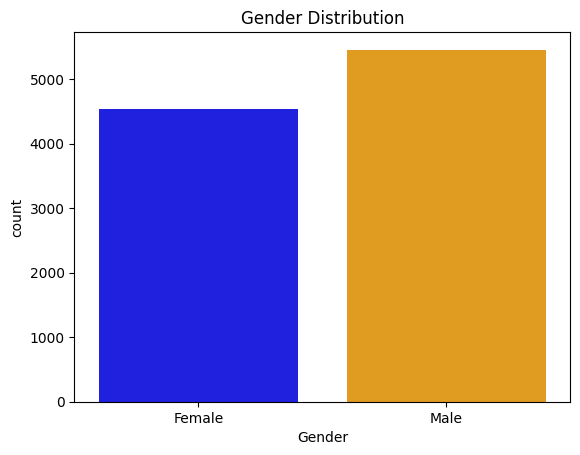

In [22]:
sns.countplot(x='Gender', hue='Gender', data=df, palette=['blue', 'orange'], dodge=False, legend=False)
plt.title('Gender Distribution')
plt.show()


<ipython-input-23-0a546b0ed020>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Geography', data=df, palette=['blue', 'orange','green'])


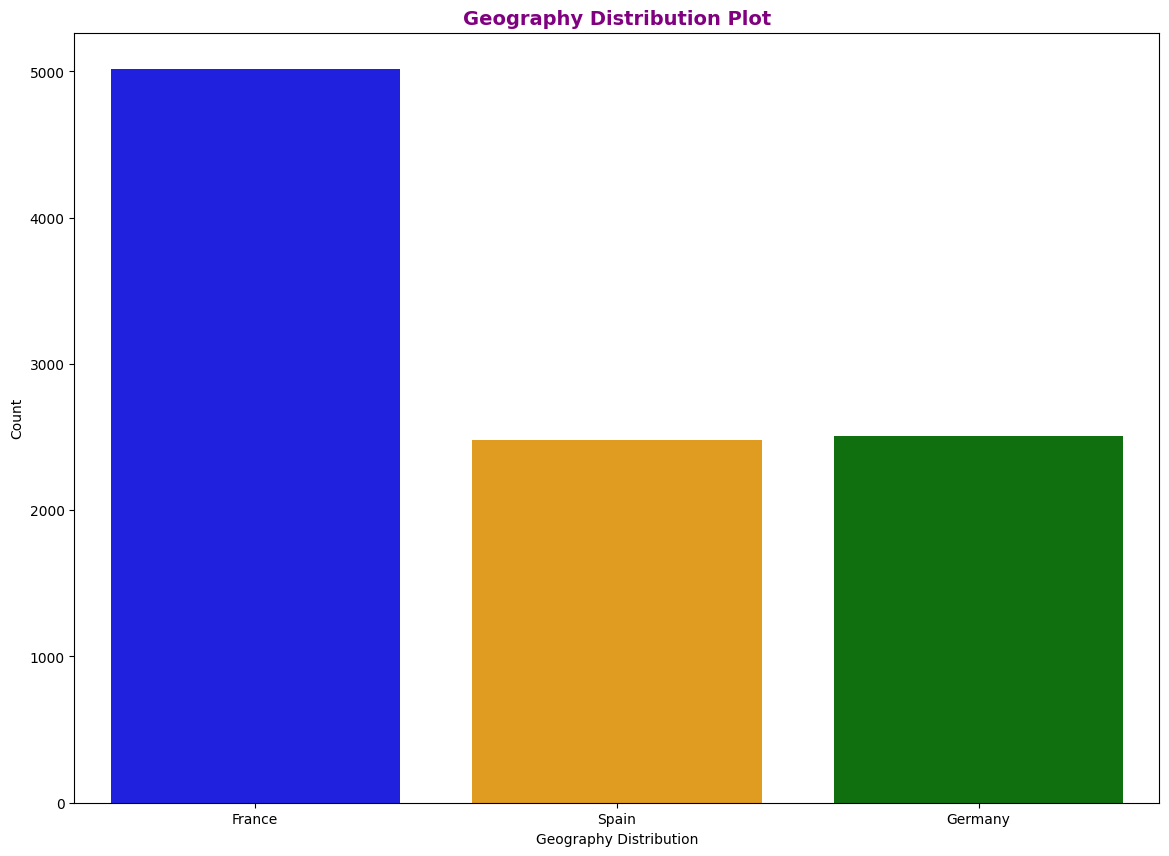

In [23]:
plt.figure(figsize=(14,10))
sns.countplot(x='Geography', data=df, palette=['blue', 'orange','green'])
plt.xlabel('Geography Distribution')
plt.ylabel('Count')
plt.title('Geography Distribution Plot',fontsize=14, fontweight="bold", color = "purple")
plt.show()

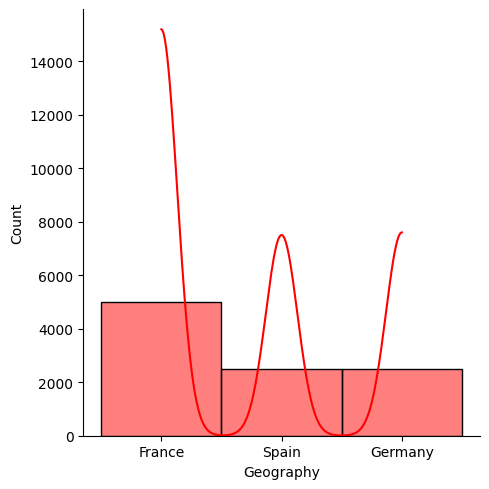

In [ ]:
sns.displot(df.Geography, kde =True, color = "red")

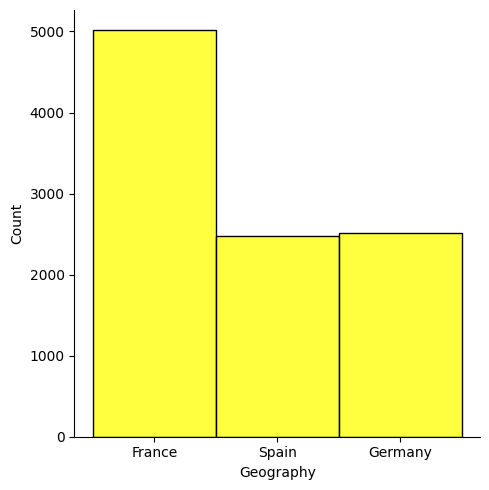

In [ ]:
sns.displot(df.Geography, color = "yellow")

<ipython-input-24-25f5b1c55d50>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = count1, y = count1.index, orient = 'h', palette=['blue', 'orange', 'green'])


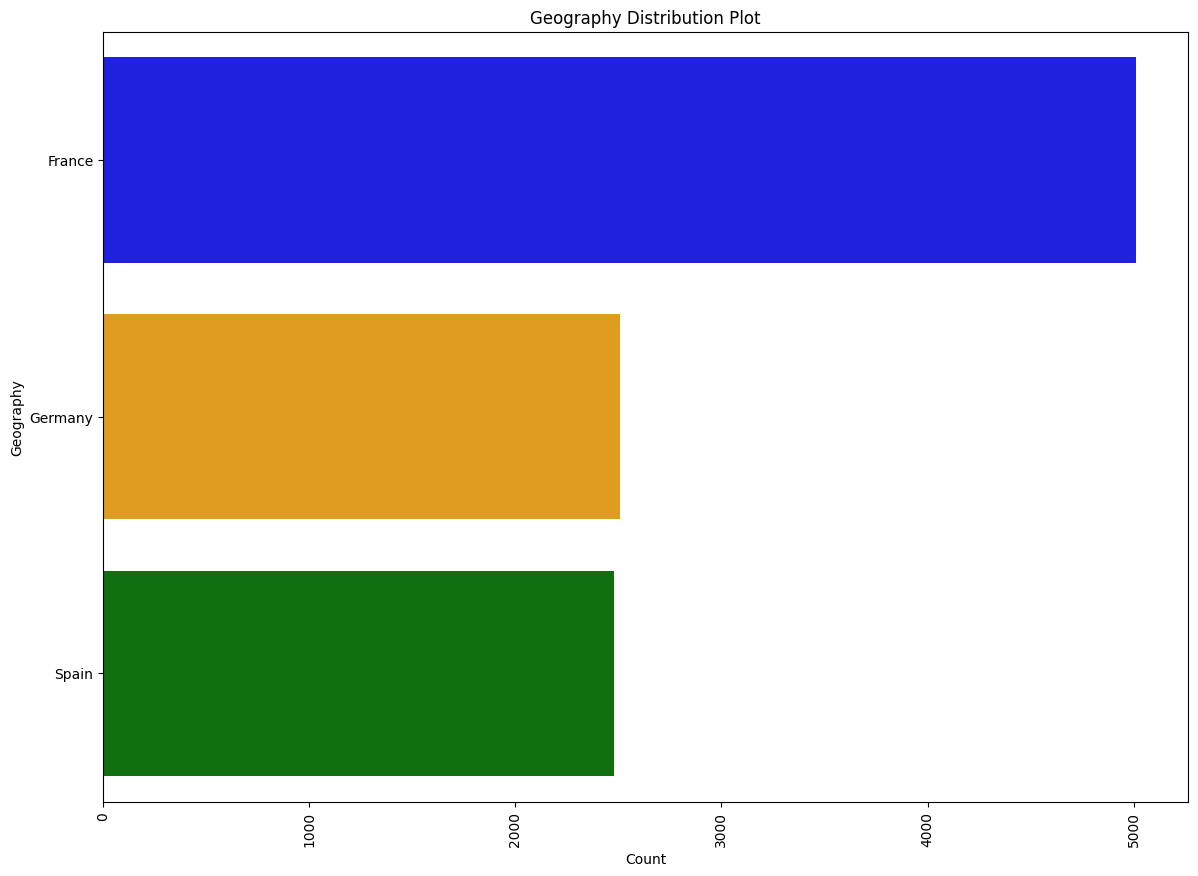

In [24]:
plt.figure(figsize = (14,10))
count1 = df.Geography.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h', palette=['blue', 'orange', 'green'])
plt.xlabel('Count')
plt.ylabel('Geography')
plt.title('Geography Distribution Plot')
plt.xticks(rotation=90)
plt.show()

<ipython-input-25-f00ade71dd8e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = count1, y = count1.index, orient = 'h', palette=['blue', 'orange', 'green'])


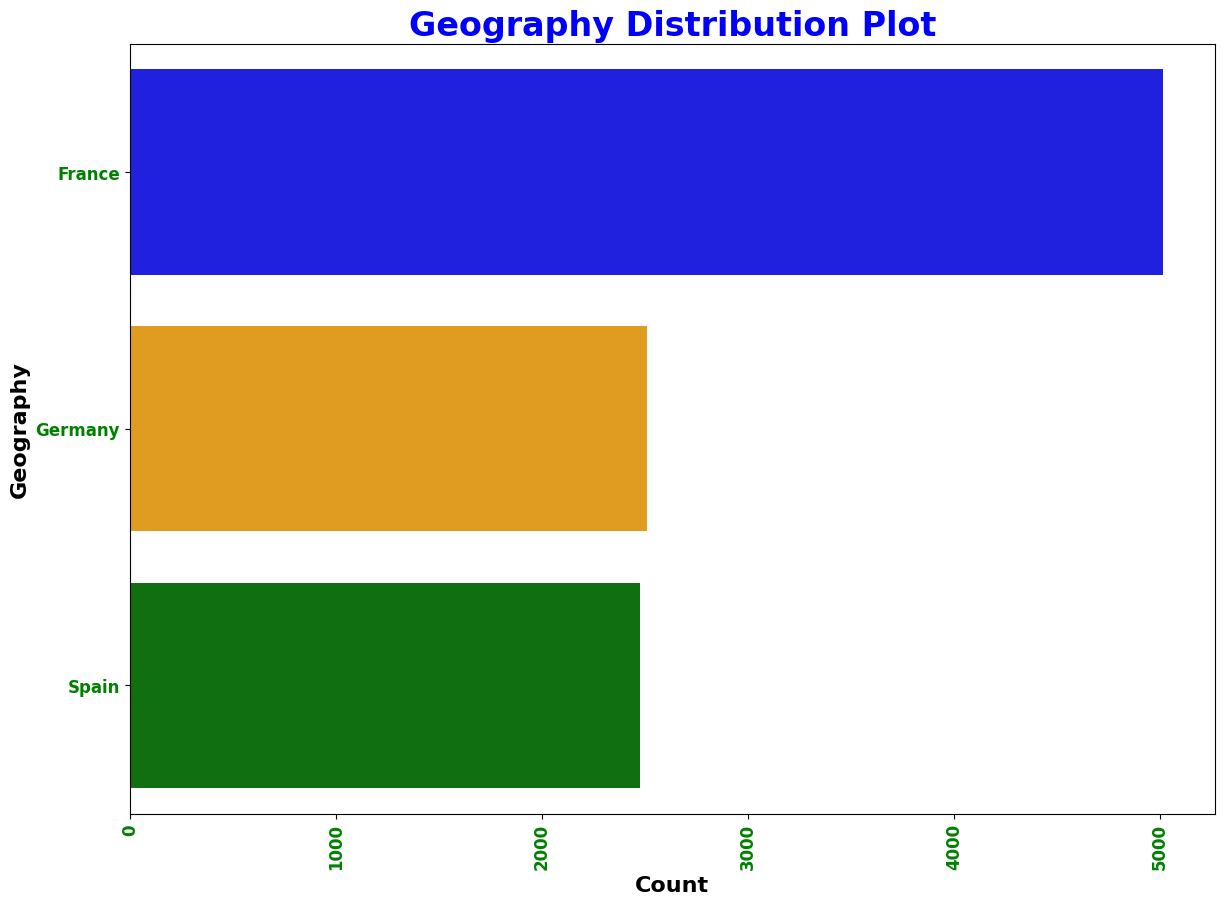

In [25]:
plt.figure(figsize = (14,10))
count1 = df.Geography.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h', palette=['blue', 'orange', 'green'])
plt.xlabel('Count', fontsize = 16, fontweight = 'bold')
plt.ylabel('Geography', fontsize = 16, fontweight = 'bold')
plt.title('Geography Distribution Plot', fontsize = 24, fontweight = 'bold', color = 'blue')
plt.xticks(rotation=90, fontsize = 12, fontweight = 'bold', color = 'green')
plt.yticks(fontsize = 12, fontweight = 'bold', color = 'green')
plt.show()

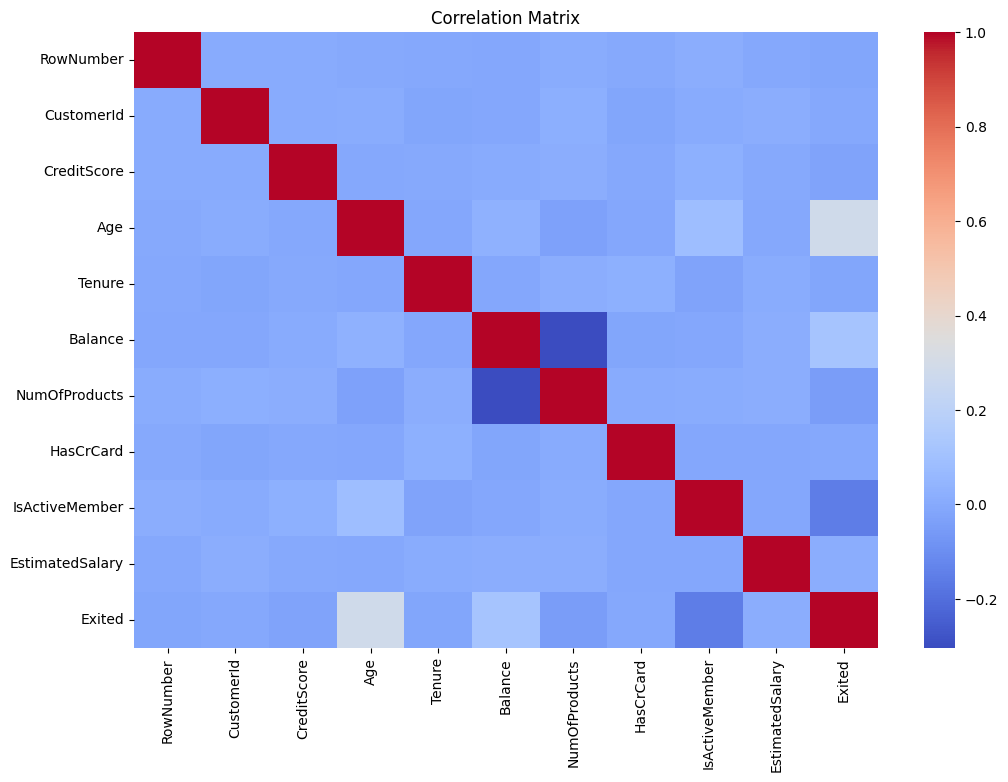

In [26]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot = False,  fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#Preprocess the data


In [27]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
df = pd.get_dummies(df, drop_first = True)

In [29]:
df.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,False,False,False,False,False,False,False,False,False,False
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,False,False,False,False,False,False,False,False,True,False
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,False,False,False,False,False,False,False,False,False,False
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,False,False,False,False,False,False,False,False,False,False
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,False,False,False,False,False,False,False,False,True,False


In [30]:
X = df.drop("Exited", axis = 1)
y = df["Exited"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

#Train Logistic Regression Model

In [33]:
lr_model = LogisticRegression()

In [34]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [36]:
lr_predictions = lr_model.predict(X_test)

In [37]:
print("Logistic Regression Model:")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print("Accuracy: ", accuracy_score(y_test, lr_predictions))
print("r2_Score: ", r2_score(y_test, lr_predictions))
print("Precision_score: ", precision_score(y_test, lr_predictions))
print("Recall_score: ", recall_score(y_test, lr_predictions))
print("f1_score: ", f1_score(y_test, lr_predictions))

Logistic Regression Model:
[[1476  131]
 [ 306   87]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1607
           1       0.40      0.22      0.28       393

    accuracy                           0.78      2000
   macro avg       0.61      0.57      0.58      2000
weighted avg       0.74      0.78      0.76      2000

Accuracy:  0.7815
r2_Score:  -0.38389457066808563
Precision_score:  0.39908256880733944
Recall_score:  0.22137404580152673
f1_score:  0.28477905073649756


#Train Random Forests Model

In [38]:
rf_model = RandomForestClassifier(n_estimators=1000, n_jobs = -1, random_state=42)

In [39]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [40]:
rf_predictions = rf_model.predict(X_test)

In [41]:
print("Random Forest Model:")
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))
print("Accuracy: ", accuracy_score(y_test, rf_predictions))
print("r2_Score: ", r2_score(y_test, rf_predictions))
print("Precision_score: ", precision_score(y_test, rf_predictions))
print("Recall_score: ", recall_score(y_test, rf_predictions))
print("f1_score: ", f1_score(y_test, rf_predictions))

Random Forest Model:
[[1584   23]
 [ 255  138]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1607
           1       0.86      0.35      0.50       393

    accuracy                           0.86      2000
   macro avg       0.86      0.67      0.71      2000
weighted avg       0.86      0.86      0.84      2000

Accuracy:  0.861
r2_Score:  0.11962771019284257
Precision_score:  0.8571428571428571
Recall_score:  0.3511450381679389
f1_score:  0.49819494584837537


#Train Gradient Boosting Model

In [42]:
gb_model = GradientBoostingClassifier(n_estimators=1000, learning_rate = 0.02, max_depth = 1, random_state=42)

In [43]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000,
                           random_state=42)

In [44]:
gb_predictions = gb_model.predict(X_test)

In [45]:
print("Gradient Boosting Model:")
print(confusion_matrix(y_test, gb_predictions))
print(classification_report(y_test, gb_predictions))
print("Accuracy: ", accuracy_score(y_test, gb_predictions))
print("r2_Score: ", r2_score(y_test, gb_predictions))
print("Precision_score: ", precision_score(y_test, gb_predictions))
print("Recall_score: ", recall_score(y_test, gb_predictions))
print("f1_score: ", f1_score(y_test, gb_predictions))

Gradient Boosting Model:
[[1550   57]
 [ 229  164]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1607
           1       0.74      0.42      0.53       393

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000

Accuracy:  0.857
r2_Score:  0.09429325580990278
Precision_score:  0.7420814479638009
Recall_score:  0.4173027989821883
f1_score:  0.5342019543973942
